In [1]:
#import necessary packages
import numpy as np
import pandas as pd

train_in_file = 'C:/Users/24307/Downloads/Kaggle/train.csv'
test_in_file = 'C:/Users/24307/Downloads/Kaggle/test.csv'
data = pd.read_csv(train_in_file)
test = pd.read_csv(test_in_file)

In [2]:
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True


In [3]:
data.describe()

,Age,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck
count,8514.000000,8512.000000,8510.000000,8485.000000,8510.000000,8505.000000
mean,28.827930,224.687617,458.077203,173.729169,311.138778,304.854791
std,14.489021,666.717663,1611.489240,604.696458,1136.705535,1145.717189
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,19.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,38.000000,47.000000,76.000000,27.000000,59.000000,46.000000
max,79.000000,14327.000000,29813.000000,23492.000000,22408.000000,24133.000000


In [4]:
#check data shape
data.shape

(8693, 14)

In [5]:
#fill nan with median numbers
data = data.fillna(data.median(axis=0))
test = test.fillna(test.median(axis=0))

In [6]:
#check decretized candidate data
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars' nan]
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e' nan]


In [7]:
#looking for an appropriate option for missing values
from IPython.display import display
display(data.groupby('HomePlanet').count())
display(data.groupby('Destination').count())

,PassengerId,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
HomePlanet,,,,,,,,,,,,,
Earth,4602,4602,4507,4503,4602,4602,4602,4602,4602,4602,4602,4496,4602
Europa,2131,2131,2070,2094,2131,2131,2131,2131,2131,2131,2131,2085,2131
Mars,1759,1759,1722,1717,1759,1759,1759,1759,1759,1759,1759,1718,1759


,PassengerId,HomePlanet,CryoSleep,Cabin,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported
Destination,,,,,,,,,,,,,
55 Cancri e,1800,1769,1800,1750,1800,1800,1800,1800,1800,1800,1800,1757,1800
PSO J318.5-22,796,780,796,778,796,796,796,796,796,796,796,779,796
TRAPPIST-1e,5915,5765,5915,5788,5915,5915,5915,5915,5915,5915,5915,5779,5915


In [8]:
#fill nans with mode
data.HomePlanet.fillna('Earth', inplace=True)
data.Destination.fillna('TRAPPIST-1e', inplace=True)

test.HomePlanet.fillna('Earth', inplace=True)
test.Destination.fillna('TRAPPIST-1e', inplace=True)

In [9]:
#check result
print(data.HomePlanet.unique(),
      data.Cabin.unique(),
      data.Destination.unique(), sep='\n')

['Europa' 'Earth' 'Mars']
['B/0/P' 'F/0/S' 'A/0/S' ... 'G/1499/S' 'G/1500/S' 'E/608/S']
['TRAPPIST-1e' 'PSO J318.5-22' '55 Cancri e']


In [10]:
#zoom in to see cabin
len(data.Cabin.unique()), len(data.Cabin.unique()) == len(data)

(6561, False)

In [11]:
#split cabin into multiple columns
data[['A','B','C']] = data.Cabin.str.split('/', -1, expand=True)
test[['A','B','C']] = test.Cabin.str.split('/', -1, expand=True)

In [12]:
#check mode
display(data.groupby('A').count())
display(data.groupby('B').count())
display(data.groupby('C').count())

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,B,C
A,,,,,,,,,,,,,,,,
A,256,256,256,256,256,256,256,256,256,256,256,256,249,256,256,256
B,779,779,779,779,779,779,779,779,779,779,779,779,763,779,779,779
C,747,747,747,747,747,747,747,747,747,747,747,747,733,747,747,747
D,478,478,478,478,478,478,478,478,478,478,478,478,468,478,478,478
E,876,876,876,876,876,876,876,876,876,876,876,876,857,876,876,876
F,2794,2794,2794,2794,2794,2794,2794,2794,2794,2794,2794,2794,2721,2794,2794,2794
G,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559,2559,2501,2559,2559,2559
T,5,5,5,5,5,5,5,5,5,5,5,5,4,5,5,5


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,A,C
B,,,,,,,,,,,,,,,,
0,18,18,18,18,18,18,18,18,18,18,18,18,17,18,18,18
1,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15,15
10,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
100,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12,12
1000,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6,6
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
995,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3,3
996,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
997,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2,2


,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,A,B
C,,,,,,,,,,,,,,,,
P,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4206,4112,4206,4206,4206
S,4288,4288,4288,4288,4288,4288,4288,4288,4288,4288,4288,4288,4184,4288,4288,4288


In [13]:
#fill nan with mode
data.A.fillna('F', inplace=True)
data.B.fillna(0, inplace=True)
data.C.fillna('S', inplace=True)

test.A.fillna('F', inplace=True)
test.B.fillna(0, inplace=True)
test.C.fillna('S', inplace=True)

In [14]:
#check results
print(data.A.unique(), data.B.unique(), data.C.unique())

['B' 'F' 'A' 'G' 'E' 'D' 'C' 'T'] ['0' '1' '2' ... '1892' '1893' '1894'] ['P' 'S']


In [15]:
#view data
data.head()

,PassengerId,HomePlanet,CryoSleep,Cabin,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,Name,Transported,A,B,C
0,0001_01,Europa,False,B/0/P,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,Maham Ofracculy,False,B,0,P
1,0002_01,Earth,False,F/0/S,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,Juanna Vines,True,F,0,S
2,0003_01,Europa,False,A/0/S,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,Altark Susent,False,A,0,S
3,0003_02,Europa,False,A/0/S,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,Solam Susent,False,A,0,S
4,0004_01,Earth,False,F/1/S,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,Willy Santantines,True,F,1,S


In [16]:
data.columns

Index(['PassengerId', 'HomePlanet', 'CryoSleep', 'Cabin', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
       'Name', 'Transported', 'A', 'B', 'C'],
      dtype='object')

In [17]:
#get necessary columns
labels = data.Transported
data = data[['HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'A', 'B', 'C']]

test = test[['HomePlanet', 'CryoSleep', 'Destination', 'Age',
       'VIP', 'RoomService', 'FoodCourt', 'ShoppingMall', 'Spa', 'VRDeck',
        'A', 'B', 'C']]

In [18]:
#view data
display(data)

,HomePlanet,CryoSleep,Destination,Age,VIP,RoomService,FoodCourt,ShoppingMall,Spa,VRDeck,A,B,C
0,Europa,False,TRAPPIST-1e,39.0,False,0.0,0.0,0.0,0.0,0.0,B,0,P
1,Earth,False,TRAPPIST-1e,24.0,False,109.0,9.0,25.0,549.0,44.0,F,0,S
2,Europa,False,TRAPPIST-1e,58.0,True,43.0,3576.0,0.0,6715.0,49.0,A,0,S
3,Europa,False,TRAPPIST-1e,33.0,False,0.0,1283.0,371.0,3329.0,193.0,A,0,S
4,Earth,False,TRAPPIST-1e,16.0,False,303.0,70.0,151.0,565.0,2.0,F,1,S
...,...,...,...,...,...,...,...,...,...,...,...,...,...
8688,Europa,False,55 Cancri e,41.0,True,0.0,6819.0,0.0,1643.0,74.0,A,98,P
8689,Earth,True,PSO J318.5-22,18.0,False,0.0,0.0,0.0,0.0,0.0,G,1499,S
8690,Earth,False,TRAPPIST-1e,26.0,False,0.0,0.0,1872.0,1.0,0.0,G,1500,S
8691,Europa,False,55 Cancri e,32.0,False,0.0,1049.0,0.0,353.0,3235.0,E,608,S


In [19]:
len(data.A.unique())

8

In [20]:
#convert categories into numeric values
data.A = pd.factorize(data.A)[0]
data.C = pd.factorize(data.C)[0]
data.HomePlanet = pd.factorize(data.HomePlanet)[0]
data.Destination = pd.factorize(data.Destination)[0]

test.A = pd.factorize(test.A)[0]
test.C = pd.factorize(test.C)[0]
test.HomePlanet = pd.factorize(test.HomePlanet)[0]
test.Destination = pd.factorize(test.Destination)[0]

In [21]:
#ready for preprocessing
data = data.astype('int')
test = test.astype('int')

In [22]:
#start preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
scaler = StandardScaler()
X = scaler.fit_transform(data)
test = scaler.fit_transform(test)

In [23]:
X_train, y_train, X_test, y_test = train_test_split(X, labels, test_size = 0.25, shuffle=True)

It seems to be a binary classified structure, vaguely separated by the the middle blue line.

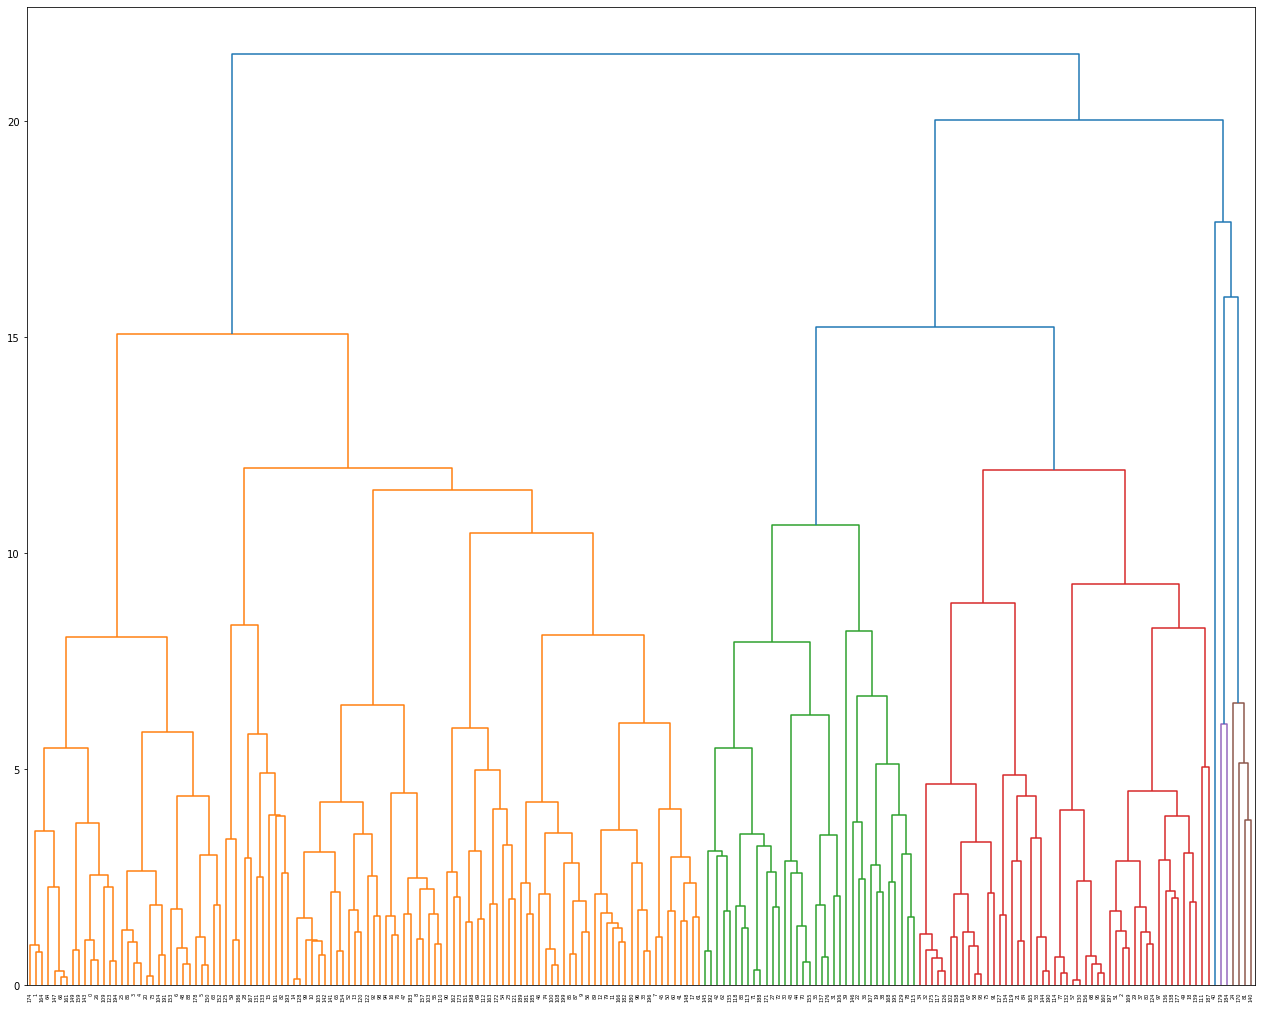

In [24]:
#using hierachical clustering to understand data
from scipy.cluster.hierarchy import linkage, dendrogram
import matplotlib.pyplot as plt

plt.figure(figsize=(22, 18))
linkage_type = 'ward'
linkage_matrix = linkage(X_train[:200, :], linkage_type)
dendrogram(linkage_matrix)
plt.show()

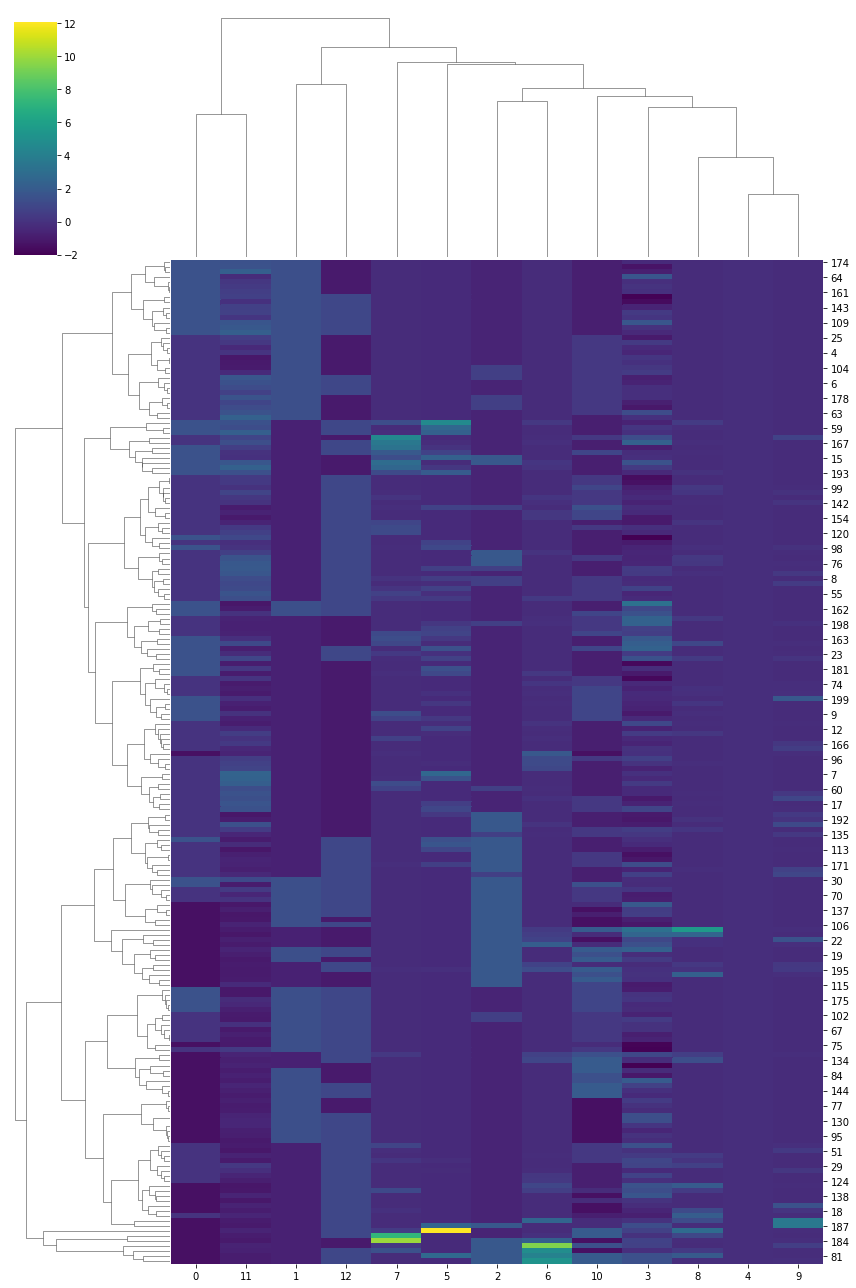

In [25]:
#using seaborn to see clearer
import seaborn as sns

sns.clustermap(X_train[:200, :], figsize=(12, 18), method=linkage_type, cmap='viridis')
plt.show()

In [26]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.metrics import adjusted_rand_score

complete = AgglomerativeClustering(n_clusters=3000, linkage='complete')
complete_pred = complete.fit_predict(X_train)

average = AgglomerativeClustering(n_clusters=3000, linkage='average')
average_pred = average.fit_predict(X_train)

ward = AgglomerativeClustering(n_clusters=3000)
ward_pred = ward.fit_predict(X_train)

complete_score = adjusted_rand_score(X_test.astype('int'), complete_pred)
average_score = adjusted_rand_score(X_test.astype('int'), average_pred)
ward_score = adjusted_rand_score(X_test.astype('int'), ward_pred)

print('Scores: \nWard:', ward_score, '\nAverage:', average_score, '\nComplete:', complete_score)

Scores: 
Ward: 0.00046682863109264133 
Average: 0.0009896692464327532 
Complete: 0.0006315695929614485


Text(0.5, 1.0, 'Scree Plot')

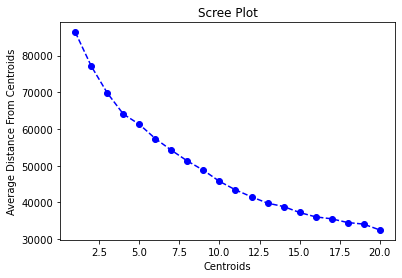

In [27]:
from sklearn.cluster import KMeans

def k_fit(k):
    scores = []
    for _ in range(1, k+1):
        kmeans_k = KMeans(_)
        kmeans_k.fit(X_train)
        scores.append(abs(kmeans_k.score(X_train)))
    return scores

k=20
scores = k_fit(k)
plt.plot(range(1,k+1), scores, '--', marker='o', color='b')
plt.xlabel('Centroids')
plt.ylabel('Average Distance From Centroids')
plt.title('Scree Plot')

In [28]:
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score

def train(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_selection = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=1000, min_samples_leaf=3)
            model.fit(X_train, X_test)
            prediction = model.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=1000)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=2000)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_train)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        model_selection.append(model)
    return model_selection
            
results = train([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_train,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=1000) 0.7925482980680773
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 0.7667893284268629
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=1000) 0.7907083716651334
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.7437902483900644


In [29]:
#We could try adding clustered labels into data to see if that helps improvement
ward = AgglomerativeClustering(n_clusters=2000)
X_ward_pred = ward.fit_predict(X_train)
X_ward_pred = scaler.fit_transform(X_ward_pred.reshape(-1,1))
X_added = np.hstack((X_train, ward_pred.reshape(-1,1)))
y_ward_pred = ward.fit_predict(y_train)
y_ward_pred = scaler.fit_transform(y_ward_pred.reshape(-1,1))
y_added = np.hstack((y_train, y_ward_pred.reshape(-1,1)))

t_added = ward.fit_predict(test)
t_added = scaler.fit_transform(t_added.reshape(-1,1))
t_added = np.hstack((test, t_added.reshape(-1,1)))

def train2(models, X_train, X_test, n_estimators=None, min_samples_leaf=None):
    model_selection = []
    for model in models:
        if model != AdaBoostClassifier and model != DecisionTreeClassifier:
            model = model(n_estimators=2000, min_samples_leaf=3, min_samples_split=2)
            model.fit(X_train, X_test)
            prediction = model.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        elif model != DecisionTreeClassifier:
            rf = DecisionTreeClassifier(min_samples_leaf=3, max_depth=25)
            ada = model(base_estimator=rf, n_estimators=1000)
            ada.fit(X_train, X_test)
            prediction = ada.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        else:
            tree = DecisionTreeClassifier(min_samples_leaf=3, max_depth=2000)
            tree.fit(X_train, X_test)
            prediction = tree.predict(y_added)
            score = accuracy_score(prediction, y_test)
            print(model, score)
        model_selection.append(model)
    return model_selection
results2 = train2([RandomForestClassifier, AdaBoostClassifier, GradientBoostingClassifier, DecisionTreeClassifier],
      X_added,
      X_test)

RandomForestClassifier(min_samples_leaf=3, n_estimators=2000) 0.7934682612695492
<class 'sklearn.ensemble._weight_boosting.AdaBoostClassifier'> 0.7391904323827047
GradientBoostingClassifier(min_samples_leaf=3, n_estimators=2000) 0.7833486660533578
<class 'sklearn.tree._classes.DecisionTreeClassifier'> 0.735510579576817


looks clustered labels are more effective

In [30]:
#Use grid search to find best parameters
from sklearn.metrics import make_scorer, f1_score
from sklearn.model_selection import GridSearchCV

clf = RandomForestClassifier()
parameters = {'n_estimators':[1000],
              'min_samples_leaf': [3, 5, 7]}

scorer = make_scorer(f1_score)
grid_obj = GridSearchCV(clf, scoring=scorer, param_grid=parameters)
print('done1')
grid_obj.fit(X_train, X_test.astype('int'))
print('done2')
best_clf = grid_obj.best_estimator_
best_clf.fit(X_train, X_test.astype('int'))
print('done3')
prediction = best_clf.predict(y_train)
print(accuracy_score(prediction, y_test.astype('int')), f1_score(prediction, y_test.astype('int')))

done1
done2
done3
0.7934682612695492 0.7941311325080239


In [31]:
rf_model = results2[0]
np.savetxt('result.txt', rf_model.predict(t_added), fmt='%s')

In [32]:
#Curious about how Xgboost performs
from xgboost import XGBClassifier
model = XGBClassifier(n_estimators=800, min_samples_leaf=2, max_depth=50)
model.fit(X_train, X_test)
prediction = model.predict(y_train)
score = accuracy_score(prediction, y_test)
print(model, score, sep='\n')

D:\miniconda\envs\dl-pytorch-1.7.0\lib\site-packages\xgboost\sklearn.py:1224: UserWarning: The use of label encoder in XGBClassifier is deprecated and will be removed in a future release. To remove this warning, do the following: 1) Pass option use_label_encoder=False when constructing XGBClassifier object; and 2) Encode your labels (y) as integers starting with 0, i.e. 0, 1, 2, ..., [num_class - 1].
  warnings.warn(label_encoder_deprecation_msg, UserWarning)


[20:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:576: 
Parameters: { "min_samples_leaf" } might not be used.

  This could be a false alarm, with some parameters getting used by language bindings but
  then being mistakenly passed down to XGBoost core, or some parameter actually being used
  but getting flagged wrongly here. Please open an issue if you find any such cases.


[20:08:11] WARNING: C:/Users/Administrator/workspace/xgboost-win64_release_1.5.1/src/learner.cc:1115: Starting in XGBoost 1.3.0, the default evaluation metric used with the objective 'binary:logistic' was changed from 'error' to 'logloss'. Explicitly set eval_metric if you'd like to restore the old behavior.
XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
              gamma=0, gpu_id=-1, importance_type=None,
              interaction_constraints='', learning_rate=0.30